In [1]:
import pandas as pd

from chembl_webresource_client.new_client import new_client

In [2]:
target = new_client.target

target_query = target.search('PTPN6')

targets = pd.DataFrame.from_dict(target_query)

In [3]:
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P29350', 'xref_name': None, 'xre...",Homo sapiens,Protein-tyrosine phosphatase 1C,13.0,False,CHEMBL3166,"[{'accession': 'P29350', 'component_descriptio...",SINGLE PROTEIN,9606


In [4]:
selected_target = targets.target_chembl_id[0]

selected_target

#Here, we will retrieve only bioactivity data for nicotinic acetylcholine receptor (CHEMBL2492) that are reported as pChEMBL values

activity = new_client.activity

res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

df = pd.DataFrame.from_dict(res)

In [5]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,688575,[],CHEMBL801966,Inhibitory activity against Protein tyrosine p...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Protein-tyrosine phosphatase 1C,9606,None,None,IC50,uM,UO_0000065,None,6.3
1,None,692357,[],CHEMBL801966,Inhibitory activity against Protein tyrosine p...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Protein-tyrosine phosphatase 1C,9606,None,None,IC50,uM,UO_0000065,None,61.0
2,None,699450,[],CHEMBL801966,Inhibitory activity against Protein tyrosine p...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Protein-tyrosine phosphatase 1C,9606,None,None,IC50,uM,UO_0000065,None,31.0
3,None,708350,[],CHEMBL801966,Inhibitory activity against Protein tyrosine p...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Protein-tyrosine phosphatase 1C,9606,None,None,IC50,uM,UO_0000065,None,16.0
4,None,712310,[],CHEMBL801966,Inhibitory activity against Protein tyrosine p...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Protein-tyrosine phosphatase 1C,9606,None,None,IC50,uM,UO_0000065,None,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,None,20694433,[],CHEMBL4626295,Inhibition of SHP1 (unknown origin) expressed ...,A,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Protein-tyrosine phosphatase 1C,9606,None,None,IC50,uM,UO_0000065,None,30.0
399,None,20694434,[],CHEMBL4626295,Inhibition of SHP1 (unknown origin) expressed ...,A,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Protein-tyrosine phosphatase 1C,9606,None,None,IC50,uM,UO_0000065,None,33.8
400,None,20694435,[],CHEMBL4626295,Inhibition of SHP1 (unknown origin) expressed ...,A,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Protein-tyrosine phosphatase 1C,9606,None,None,IC50,uM,UO_0000065,None,30.0
401,None,20694436,[],CHEMBL4626295,Inhibition of SHP1 (unknown origin) expressed ...,A,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Protein-tyrosine phosphatase 1C,9606,None,None,IC50,uM,UO_0000065,None,13.7


In [6]:
df.to_csv('/Users/mrinalmishra/Documents/drug_discovery/PTPN6_01_bioactivity_data_raw.csv', index=False)

#Handling missing data
#If any compounds has missing value for the standard_value and canonical_smiles column then drop it.

df2 = df[df.standard_value.notna()]

df2 = df2[df.canonical_smiles.notna()]

#Extracting rows with unique canonical_smiles

len(df2.canonical_smiles.unique())

df2_nr = df2.drop_duplicates(['canonical_smiles'])

#Data pre-processing of the bioactivity data
#Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

selection = ['molecule_chembl_id','canonical_smiles','standard_value']

df3 = df2_nr[selection]

df3.to_csv('/Users/mrinalmishra/Documents/drug_discovery/PTPN6_02_bioactivity_data_preprocessed.csv', index=False)

#Labeling compounds as either being active, inactive or intermediate

df4 = pd.read_csv('/Users/mrinalmishra/Documents/drug_discovery/PTPN6_02_bioactivity_data_preprocessed.csv')

bioactivity_threshold = []

for i in df4.standard_value:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")


bioactivity_class = pd.Series(bioactivity_threshold, name='class')

df5 = pd.concat([df4, bioactivity_class], axis=1)

df5.to_csv('/Users/mrinalmishra/Documents/drug_discovery/PTPN6_03_bioactivity_data_curated.csv', index=False)



/Users/mrinalmishra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [7]:
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL140954,O=P(O)(O)C(F)(F)c1ccc(COc2ccc(OCc3ccc(C(F)(F)P...,6300.0,intermediate
1,CHEMBL344437,N.N.N.N.O=P(O)(O)C(F)(F)c1ccc(COCCOCc2ccc(C(F)...,61000.0,inactive
2,CHEMBL1161222,O=P(O)(O)C(F)(F)c1ccc(CCCCc2ccc(C(F)(F)P(=O)(O...,31000.0,inactive
3,CHEMBL140524,O=P(O)(O)C(F)(F)c1ccc(COc2cccc(OCc3ccc(C(F)(F)...,16000.0,inactive
4,CHEMBL337604,O=P(O)(O)C(F)(F)c1ccc(COc2ccccc2OCc2ccc(C(F)(F...,15000.0,inactive
...,...,...,...,...
291,CHEMBL4647367,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Cl)cc1,30000.0,inactive
292,CHEMBL4637373,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Br)cc1,33800.0,inactive
293,CHEMBL4638011,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2F)cc1,30000.0,inactive
294,CHEMBL4641106,N#Cc1cc(C(F)(F)F)ccc1C#Cc1ccc(NC(=O)C(=O)O)cc1,13700.0,inactive


/Users/mrinalmishra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/Users/mrinalmishra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


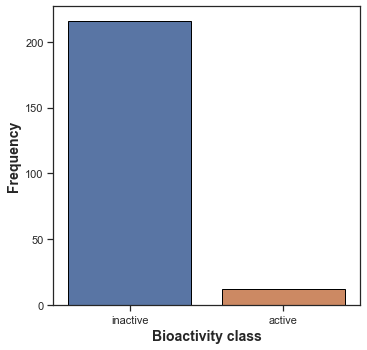

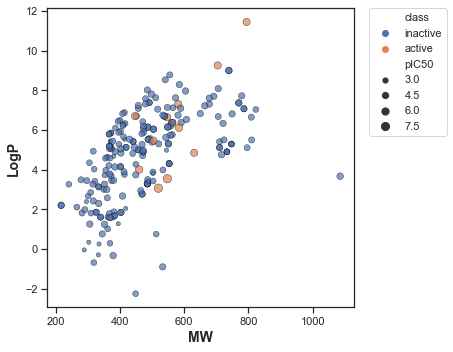

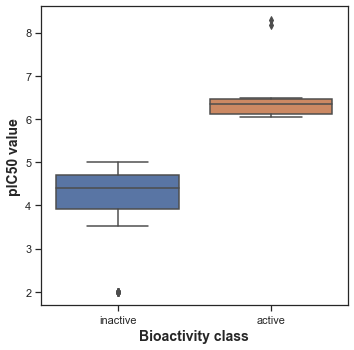

In [8]:
df = pd.read_csv('/Users/mrinalmishra/Documents/drug_discovery/PTPN6_03_bioactivity_data_curated.csv')


df_no_smiles = df.drop(columns='canonical_smiles')

smiles = []

for i in df.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)

#Calculate Lipinski descriptors for evaluating the druglikeness of compounds
#Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
#Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile
#Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

#The Lipinski's Rule stated the following:
##Molecular weight < 500 Dalton
##Octanol-water partition coefficient (LogP) < 5
##Hydrogen bond donors < 5
##Hydrogen bond acceptors < 10

import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,desc_MolLogP,desc_NumHDonors,desc_NumHAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors

df_lipinski = lipinski(df_clean_smiles.canonical_smiles)

df_combined = pd.concat([df,df_lipinski], axis=1)

#Convert IC50 to pIC50
#To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

import numpy as np

def pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
    return x
#Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative

def norm_value(input):
    norm = []
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
    return x

df_norm = norm_value(df_combined)

df_final = pIC50(df_norm)

df_final.to_csv('/Users/mrinalmishra/Documents/drug_discovery/PTPN6_bioactivity_data_3class_pIC50.csv')

#Removing the 'intermediate' bioactivity class

df_2class = df_final[df_final['class'] != 'intermediate']

#Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/plot_PTPN6_bioactivity_class.pdf')



#Scatter plot of MW versus LogP
#It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')

plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/plot_PTPN6_MW_vs_LogP.pdf')

#Box plots
#pIC50 value

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/plot_PTPN6_plot_ic50.pdf')


#Statistical analysis | Mann-Whitney U Test
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

def mannwhitney(descriptor, verbose=False):
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    seed(1)# seed the random number generator
    selection = [descriptor, 'class']# actives and inactives
    df = df_2class[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]
    selection = [descriptor, 'class']
    df = df_2class[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]
    stat, p = mannwhitneyu(active, inactive)# compare samples
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05 # interpret
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    results = pd.DataFrame({'Descriptor':descriptor,'Statistics':stat,'p':p,'alpha':alpha,'Interpretation':interpretation}, index=[0])
    filename = '/Users/mrinalmishra/Documents/drug_discovery/PTPN6_' + 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)
    return results

Statistics=2592.000, p=0.000
Statistics=1961.000, p=0.003
Statistics=1723.000, p=0.055
Statistics=1741.500, p=0.038


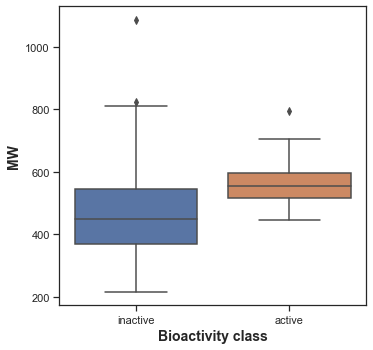

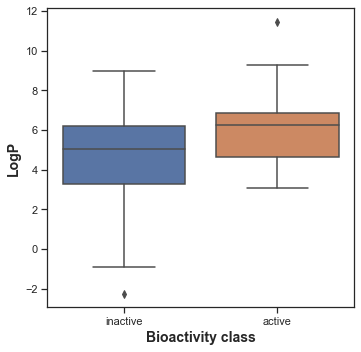

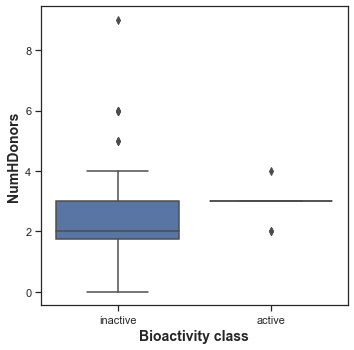

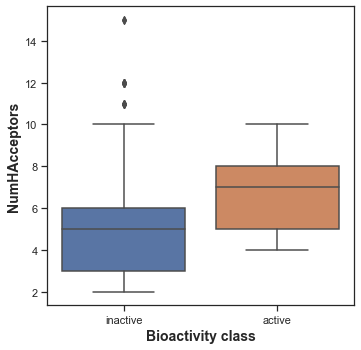

In [9]:
mannwhitney('pIC50')

#MW

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/PTPN6_plot_MW.pdf')

mannwhitney('MW')

#LogP

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/PTPN6_plot_LogP.pdf')

mannwhitney('LogP')

#NumHDonors

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/PTPN6_plot_NumHDonors.pdf')

mannwhitney('NumHDonors')

#NumHAcceptors

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/PTPN6_plot_NumHAcceptors.pdf')
mannwhitney('NumHAcceptors')

In [10]:
mannwhitney('pIC50')


Statistics=2592.000, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,2592.0,5.239933e-09,0.05,Different distribution (reject H0)


In [11]:
mannwhitney('MW')

Statistics=1961.000, p=0.003


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1961.0,0.00281,0.05,Different distribution (reject H0)


In [12]:
mannwhitney('LogP')

Statistics=1723.000, p=0.055


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1723.0,0.055149,0.05,Same distribution (fail to reject H0)


In [13]:
mannwhitney('NumHDonors')

Statistics=1741.500, p=0.038


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1741.5,0.038202,0.05,Different distribution (reject H0)


In [14]:
mannwhitney('NumHAcceptors')

Statistics=1807.500, p=0.020


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1807.5,0.020243,0.05,Different distribution (reject H0)


In [15]:
import pandas as pd

from chembl_webresource_client.new_client import new_client

In [26]:
target = new_client.target

target_query = target.search('TRPM2')

targets = pd.DataFrame.from_dict(target_query)

In [27]:
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Rattus norvegicus,Transient receptor potential cation channel su...,17.0,False,CHEMBL4295638,"[{'accession': 'E9PTA2', 'component_descriptio...",SINGLE PROTEIN,10116
1,"[{'xref_id': 'TRPM2', 'xref_name': None, 'xref...",Homo sapiens,Transient receptor potential cation channel su...,12.0,False,CHEMBL1250402,"[{'accession': 'O94759', 'component_descriptio...",SINGLE PROTEIN,9606


In [28]:
selected_target = targets.target_chembl_id[1]

selected_target

#Here, we will retrieve only bioactivity data for nicotinic acetylcholine receptor (CHEMBL2492) that are reported as pChEMBL values

activity = new_client.activity

res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

df = pd.DataFrame.from_dict(res)

In [29]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,13899807,[],CHEMBL3111086,Inhibition of TRPM2 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,70.0
1,None,13899809,[],CHEMBL3111089,Antagonist activity at human TRPM2 expressed i...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,3.0
2,None,13899810,[],CHEMBL3111089,Antagonist activity at human TRPM2 expressed i...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,15.0
3,Not Active,13899811,[],CHEMBL3111089,Antagonist activity at human TRPM2 expressed i...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,None,None,None,None
4,None,13899812,[],CHEMBL3111085,Antagonist activity at human TRPM2 expressed i...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,None,18423245,[],CHEMBL4154419,Inhibition of human TRPM2 expressed in HEK293 ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,1.7
58,None,18423246,[],CHEMBL4154420,Inhibition of human TRPM2 expressed in HEK293 ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,1.7
59,None,18423248,[],CHEMBL4154422,Inhibition of human TRPM2 assessed as reductio...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,70.0
60,None,18446750,[],CHEMBL4158450,Inhibition of TRPM2 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Transient receptor potential cation channel su...,9606,None,None,IC50,uM,UO_0000065,None,10.0


In [30]:
selected_target

'CHEMBL1250402'

In [31]:
df.to_csv('/Users/mrinalmishra/Documents/drug_discovery/TRPM2_01_bioactivity_data_raw.csv', index=False)

#Handling missing data
#If any compounds has missing value for the standard_value and canonical_smiles column then drop it.

df2 = df[df.standard_value.notna()]

df2 = df2[df.canonical_smiles.notna()]

#Extracting rows with unique canonical_smiles

len(df2.canonical_smiles.unique())

df2_nr = df2.drop_duplicates(['canonical_smiles'])

#Data pre-processing of the bioactivity data
#Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

selection = ['molecule_chembl_id','canonical_smiles','standard_value']

df3 = df2_nr[selection]

df3.to_csv('/Users/mrinalmishra/Documents/drug_discovery/TRPM2_02_bioactivity_data_preprocessed.csv', index=False)

#Labeling compounds as either being active, inactive or intermediate

df4 = pd.read_csv('/Users/mrinalmishra/Documents/drug_discovery/TRPM2_02_bioactivity_data_preprocessed.csv')

bioactivity_threshold = []

for i in df4.standard_value:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")


bioactivity_class = pd.Series(bioactivity_threshold, name='class')

df5 = pd.concat([df4, bioactivity_class], axis=1)

df5.to_csv('/Users/mrinalmishra/Documents/drug_discovery/TRPM2_03_bioactivity_data_curated.csv', index=False)



/Users/mrinalmishra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [32]:
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL752,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H]...,70000.0,inactive
1,CHEMBL3110206,Nc1ncnc2c1nc(-c1ccccc1)n2[C@H]1C[C@H](O)[C@@H]...,3000.0,intermediate
2,CHEMBL3110205,Nc1ncnc2c1nc(-c1ccccc1)n2[C@@H]1O[C@H](COP(=O)...,15000.0,inactive
3,CHEMBL3110202,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,900000.0,inactive
4,CHEMBL371502,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COS(=O)(=O)NC(=O)c...,100000.0,inactive
5,CHEMBL3110204,Nc1ncnc2c1nc(-c1ccc(CC(N)C(=O)O)cc1)n2[C@@H]1O...,100000.0,inactive
6,CHEMBL3110195,Nc1ncnc2c1ncn2CCCCOP(=O)(O)OP(=O)(O)OC[C@H]1OC...,100000.0,inactive
7,CHEMBL3110213,CC(=O)c1cccc(-c2nc3c(N)ncnc3n2[C@@H]2O[C@H](CO...,49000.0,inactive
8,CHEMBL3110214,Nc1ncnc2c1nc(-c1ccsc1)n2[C@@H]1O[C@H](COP(=O)(...,51000.0,inactive
9,CHEMBL3110215,Nc1ncnc2c1nc(-c1ccccc1)n2[C@@H]1O[C@H](COP(=O)...,11000.0,inactive


/Users/mrinalmishra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/Users/mrinalmishra/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


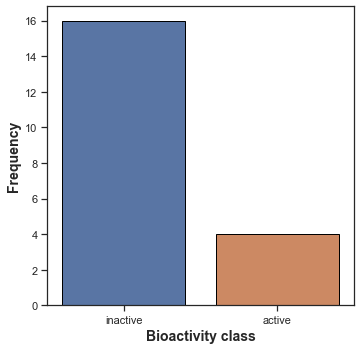

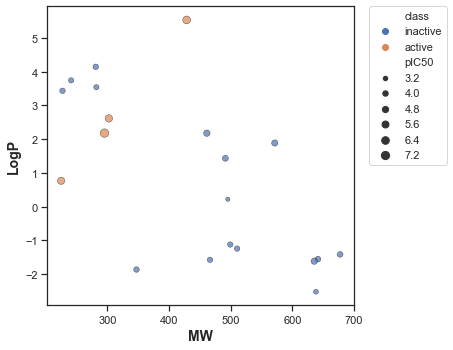

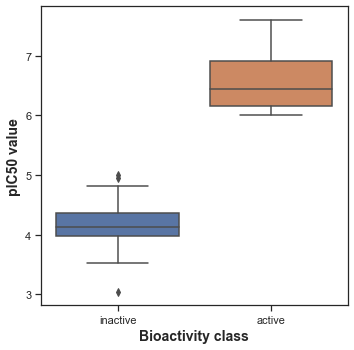

In [33]:
df = pd.read_csv('/Users/mrinalmishra/Documents/drug_discovery/TRPM2_03_bioactivity_data_curated.csv')


df_no_smiles = df.drop(columns='canonical_smiles')

smiles = []

for i in df.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)

#Calculate Lipinski descriptors for evaluating the druglikeness of compounds
#Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
#Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile
#Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

#The Lipinski's Rule stated the following:
##Molecular weight < 500 Dalton
##Octanol-water partition coefficient (LogP) < 5
##Hydrogen bond donors < 5
##Hydrogen bond acceptors < 10

import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,desc_MolLogP,desc_NumHDonors,desc_NumHAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors

df_lipinski = lipinski(df_clean_smiles.canonical_smiles)

df_combined = pd.concat([df,df_lipinski], axis=1)

#Convert IC50 to pIC50
#To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

import numpy as np

def pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
    return x
#Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative

def norm_value(input):
    norm = []
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
    return x

df_norm = norm_value(df_combined)

df_final = pIC50(df_norm)

df_final.to_csv('/Users/mrinalmishra/Documents/drug_discovery/TRPM2_bioactivity_data_3class_pIC50.csv')

#Removing the 'intermediate' bioactivity class

df_2class = df_final[df_final['class'] != 'intermediate']

#Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/plot_TRPM2_bioactivity_class.pdf')



#Scatter plot of MW versus LogP
#It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')

plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/plot_TRPM2_MW_vs_LogP.pdf')

#Box plots
#pIC50 value

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/plot_TRPM2_plot_ic50.pdf')


#Statistical analysis | Mann-Whitney U Test
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

def mannwhitney(descriptor, verbose=False):
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    seed(1)# seed the random number generator
    selection = [descriptor, 'class']# actives and inactives
    df = df_2class[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]
    selection = [descriptor, 'class']
    df = df_2class[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]
    stat, p = mannwhitneyu(active, inactive)# compare samples
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05 # interpret
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    results = pd.DataFrame({'Descriptor':descriptor,'Statistics':stat,'p':p,'alpha':alpha,'Interpretation':interpretation}, index=[0])
    filename = '/Users/mrinalmishra/Documents/drug_discovery/TRPM2_' + 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)
    return results

In [34]:
mannwhitney('pIC50')

Statistics=64.000, p=0.003


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,64.0,0.002863,0.05,Different distribution (reject H0)


Statistics=13.000, p=0.080


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,13.0,0.080083,0.05,Same distribution (fail to reject H0)


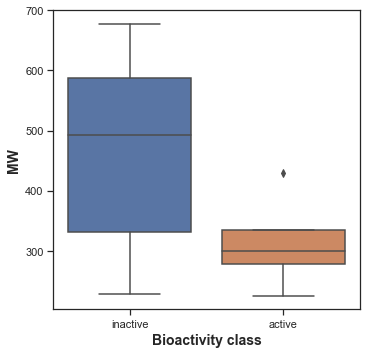

In [35]:
#MW

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/TRPM2_plot_MW.pdf')

mannwhitney('MW')

Statistics=49.000, p=0.122


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,49.0,0.121775,0.05,Same distribution (fail to reject H0)


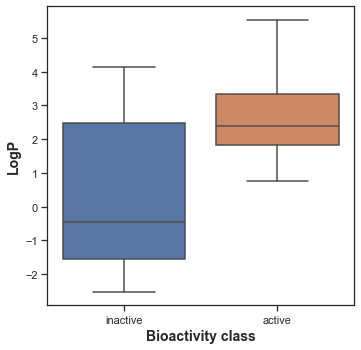

In [36]:
#LogP

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/TRPM2_plot_LogP.pdf')

mannwhitney('LogP')

Statistics=3.000, p=0.006


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3.0,0.005529,0.05,Different distribution (reject H0)


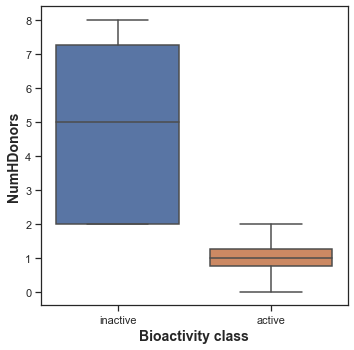

In [37]:
#NumHDonors

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/TRPM2_plot_NumHDonors.pdf')

mannwhitney('NumHDonors')


Statistics=12.500, p=0.070


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,12.5,0.070453,0.05,Same distribution (fail to reject H0)


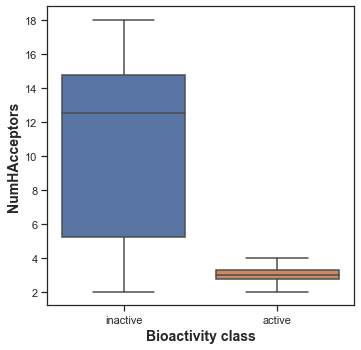

In [39]:
#NumHAcceptors

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')

plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('/Users/mrinalmishra/Documents/drug_discovery/TRPM2_plot_NumHAcceptors.pdf')
mannwhitney('NumHAcceptors')
